### Evolved clock and wavefront



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

**1.** Define functions representing the differential equations describing the time evolution of the system. This is a network evolved with $\varphi$-evo, see https://phievo.github.io/ and tutorial video https://www.youtube.com/watch?v=FRPc_hWm_JI



In [2]:
def HillA(x,t,n):
    return x**n/(x**n+t**n)


def HillR(x,t,n):
    return 1./(1.+(x/t)**n)


def deriv(vec,history,t):
    
    e = vec[:,0]
    r = vec[:,1]

    de = -0.853818252561968*e;
    dr = -0.9758821074508301*r
    
    d_e = 48
    delayed = np.zeros((n_cells,3))
    
    if (t > d_e):
        delayed = history[t-48]

    delayed_e = delayed[:,0]
    delayed_r = delayed[:,1]
    delayed_g = delayed[:,2]
    rate = 0.717566*np.maximum(HillA(delayed_e,0.321251,3.), HillA(delayed_g,0.067799,4.354903))*HillR(delayed_r,0.494191,4.532086)
    de = de+rate
            
            
    d_r = 392
    delayed = np.zeros((n_cells,3))
    if (t > d_r):
        delayed = history[t-392]

    delayed_e = delayed[:,0]
    delayed_r = delayed[:,1]
    delayed_g = delayed[:,2]
    rate = 0.942165*HillA(delayed_g,0.504665,3.213598)*HillR(delayed_r,0.115629,4.522007);
    dr = dr+rate;

    
    dg = 0*e
    return np.array([de, dr, dg]).transpose()


def compute_g(t):
    
    elongation_speed = 0.6
    
    g = np.exp((ap_positions*n_cells -elongation_speed*t))
    g[g > 1.] = 1.
    g[g < 0.] = 0.
    
    return g

**2.** Define a function that performs the integration using the Euler method.

In [3]:
def integrate(init_vec, time_param):

    init_t = time_param["init_t"]
    total_t = time_param["total_t"]
    dt = time_param["dt"]
    times = np.arange(init_t, init_t+total_t, dt)
    
    counter = 0
    n_skr = time_param["n_skr"]  # number of Steps modulo which you want to Keep the Results


    vec = init_vec
    g = compute_g(0)
    vec[:,2] = g
    results = [vec]
    history = [vec]
    times_plot = [init_t]


    for t in range(len(times[1:])):
        
        vec = vec +deriv(vec,history,t)*dt
        g = compute_g(t*dt)
        
        vec[:,2] = g
        history.append(vec)
        
        counter += 1
        if (counter %n_skr == 0):
            results.append(vec)
            times_plot.append(t*dt)
        

    results = np.array(results)
    times_plot = np.array(times_plot)
    
    return results, times_plot

**3.** Define two functions to visualise the results:

- a function that plots the kymographs of the 2 components of the system.
- a function that plots the time evolution of the 2 components of the system in a single cell

In [4]:
def plot_all_kymographs(results):
    
    fig, ax = plt.subplots(3,1)
    
    # Plot kymographs for the different species
    for index in range(3):
        
        i = int((index)/2)  # Row index in the plot grid
        j = index%2         # Column index in the plot grid
        
        ax[index].axis('off')

        norm = colors.Normalize(vmin=-1.0, vmax=1.0)   
        graph = ax[index].imshow(results[:,:,index].transpose(), norm=norm, origin='lower', aspect='auto')
    
        colorbar = fig.colorbar(graph, ticks=[1.0,0.5,0.0,-0.5,-1.0], ax=ax[index])
        colorbar.ax.tick_params(labelsize=8)
        ax[index].set_title(names_plot[index], fontsize=10)
    
    fig.savefig('Kymographs_evolved.png', dpi=300)



def plot_time_course(results, times, cell_position):
    
    fig, ax = plt.subplots()
    for index in range(3):
        ax.plot(times, results[:,cell_position,index], colors_plot[index], label=names_plot[index])
        
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentration')
    ax.legend()
    
    fig.savefig('Conc_time_course_evolved.pdf') 

**4.** We now integrate within an embryo and visualize the time course in two different cells, stabilizing in two different fates (defined by E concentrations).

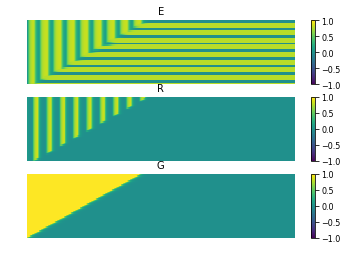

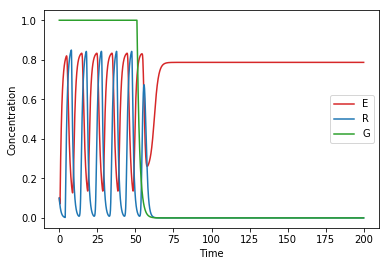

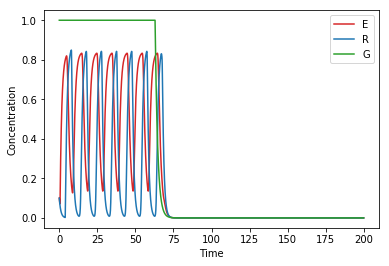

In [15]:
time_param = {
    "init_t" : 0.,
    "total_t" : 200.,
    "dt" : 0.01,
    "n_skr" : 10  # number of Steps modulo which you want to Keep the Results
}


n_cells = 50
ap_positions = np.linspace(0.0, 1.0, n_cells)

names_plot = ['E', 'R', 'G']
colors_plot = ['tab:red', 'tab:blue', 'tab:green']

init_vec = 0.1*np.ones((n_cells, 3))


results, times_plot = integrate(init_vec, time_param)

plot_all_kymographs(results)
plot_time_course(results, times_plot, 30)
plot_time_course(results, times_plot, 37)